# Telco Customer Churn Analysis


**Name: Saetbyeol Choi**

## Project Objective
This project is for effective response to customer churn in the telecommunications industry. Churn is an important metric for measuring customers who leave after using service for a certain period of time, and is closely related to business' revenue. As competition has increased in the industry, retaining existing customers has become as important as acquiring new customers.

Churn's impact on business can result in fluctuations in revenue, increasing marketing cost, and potential threats to sustainability of business. A high churn rate indicates a significant number of users leaving, leading to reduced revenue. Moreover, a higher churn rate can increase marketing cost as companies need to acquire more customers. Even small changes in churn can result in big differences in returns.

The primary goal is to analyze the factors contributing to customer churn and develop a predictive model. This model will assist companies in enhancing customer retention by identifying customers at risk of churn. We will use different type of machine learning models to predict customer churn, helping companies develop marketing strategies and proactive measures to prevent loss of profits for their businesses. In conclusion, we expect customer loyalty to increase and customer churn to a minimum by strategically meeting customer needs.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import warnings

## Data Understanding

In [2]:
# Load dataset
df = pd.read_csv('Customer_Churn_Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset contains 7043 entries with 21 columns including a mix of data types. The dataset has no missing values.

In [4]:
# Descriptive Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


About 16.2% of customers are senior citizens.<br>
The average tenure is approximately 32.37 months.<br>
The average monthly charge is around \\$64.76, with charges ranging between a minimum of \\$18.25 and a maximum of \\$118.75.

In [5]:
# Check unique vales
print(df["PaymentMethod"].unique())
print(df["Contract"].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Month-to-month' 'One year' 'Two year']


From the unique values in the "PaymentMethod" and "Contract" columns, we can see that customers are using four different payment methods and 3 different type of contracts. Through this information, we can get the insight into customers' billing preferences and contract terms.

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Cleaning & Feature Engineering
>Convert the 'TotalCharges' column to numeric values and then drop rows with missing values in this column. Dropping missing values can be a reasonable approach when the number of missing entries is relatively small compared to the overall dataset, and the omitted rows are not crucial for the analysis or modeling tasks. It is essential to monitor and handle missing values to avoid potential issues in model building and accuracy.

In [7]:
# Convert 'TotalCharges' to numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# Drop missing values
df = df.dropna(subset=['TotalCharges'])
df_modified = df.copy()

In [9]:
# Revalidate na value
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [10]:
# Categorical columns
cat_col = df_modified.select_dtypes(include='object').columns

In [11]:
# Transform the target variable 'Churn' into numerical format.
df_modified['Churn'] = df_modified['Churn'].replace({'Yes': 1, 'No': 0})

In [12]:
# Replace 'No phone service' and 'No internet service' with 'No' for specific columns
modify_col = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies']
df_modified[modify_col] = df_modified[modify_col].replace({'No phone service': 'No', 'No internet service': 'No'})

In [13]:
# Apply label encoding to convert categorical variables to numerical
label_encoder = LabelEncoder()
for column in cat_col.drop(['customerID']):
    df_modified[column] = label_encoder.fit_transform(df_modified[column])

encoded_df = df_modified.copy()
encoded_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


To facilitate machine learning algorithms that generally require numerical input, label encoding is applied to convert all categorical variables (excluding 'customerID' which is less relevant to predction) into appropriate numerical variables. This is crucial for ensuring that the machine learning model can effectively process and learn from the data.

## Data Exploration
>- Categorical Columns Exploration
>- Numerical Columns Exploration
>- Churn Rate Pie Chart
>- Correlation Matrix

### *Categorical Columns Exploration*

In [14]:
# Filter categorical and numerical columns
categorical_col = cat_col.drop(['customerID'])
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns

In [15]:
# Define a function to create plots for categorical columns
def categorical_churn_rate(column, ax):
    sns.countplot(x=column, hue="Churn", data=df, palette="Set2", ax=ax)
    sns.set(style="whitegrid")
    ax.set_title(f'Churn Rate by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
    # Annotate with percentages
    total = len(df[column])
    for perc in ax.patches:
        height = perc.get_height()
        ax.annotate(f'{height/total:.1%}', (perc.get_x() + perc.get_width()/2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

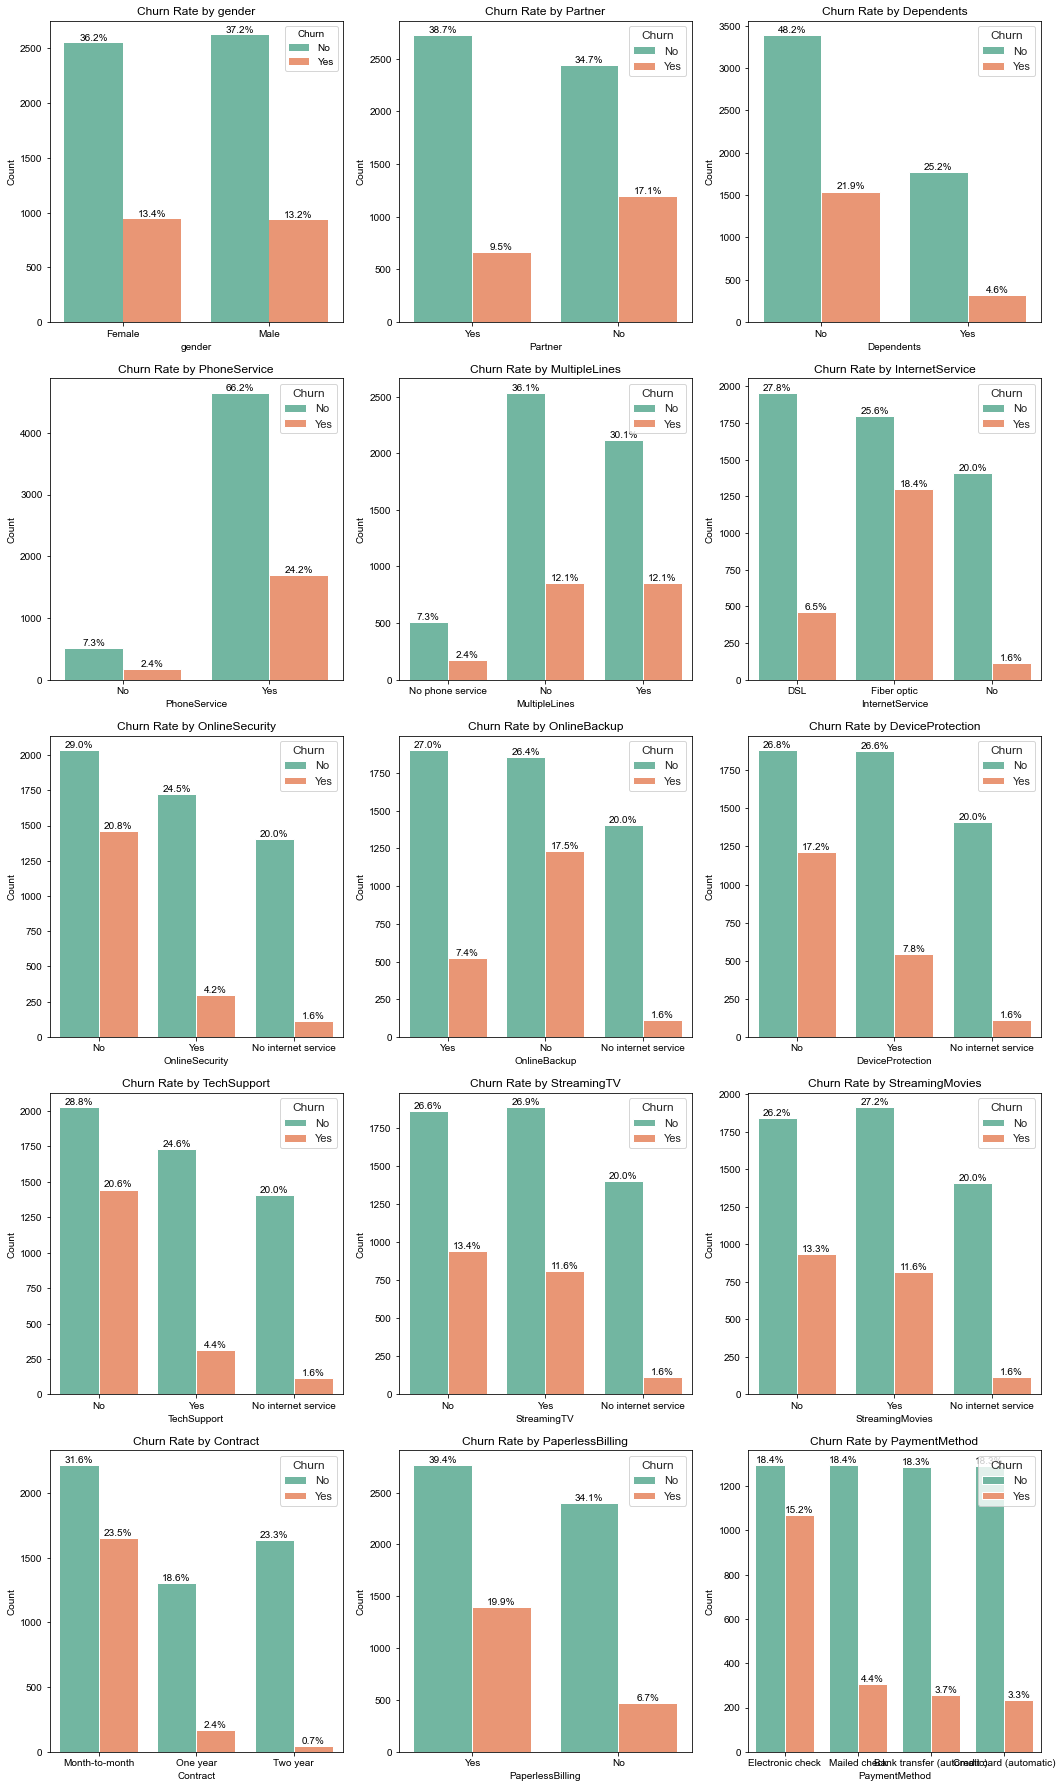

In [16]:
# Specify the number of plots in a row
plots_row_cat = 3
rows_cat = (len(categorical_col) // plots_row_cat)

# Create subplots
fig_cat, axes_cat = plt.subplots(rows_cat, plots_row_cat, figsize=(15, 5 * rows_cat))
axes_cat = axes_cat.flatten()

# Create plots 
for i, column in enumerate(categorical_col):
    if column != 'Churn':
        categorical_churn_rate(column, axes_cat[i])
        
plt.tight_layout()
plt.show()

### *Numerical Columns Exploration*

In [17]:
# Define a function to create plots for numerical columns
def numerical_churn_rate(column, ax):
    sns.histplot(df[df['Churn'] == "No"][column], label='Churn: No', kde=True, color='seagreen', ax=ax)
    sns.histplot(df[df['Churn'] == "Yes"][column], label='Churn: Yes', kde=True, color='coral', ax=ax)
    sns.set(style="whitegrid")
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend()

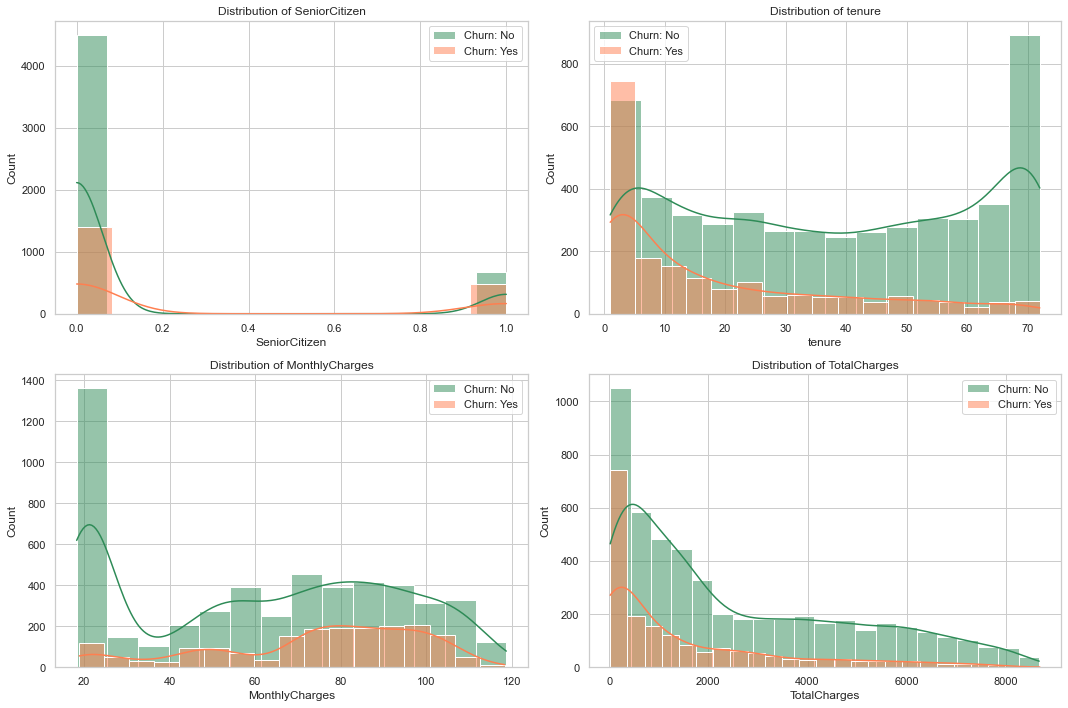

In [18]:
# Specify the number of plots in a row
plots_row_num = 2
rows_num = (len(numerical_col) // plots_row_num)

# Create subplots
fig_num, axes_num = plt.subplots(rows_num, plots_row_num, figsize=(15, 5 * rows_num))
axes_num = axes_num.flatten()

# Create plots
for i, column in enumerate(numerical_col):
    if column != 'Churn':
        numerical_churn_rate(column, axes_num[i])

plt.tight_layout()
plt.show()

The gender distribution in the dataset is relatively balanced, with almost equal proportions of male and female customers, indicating no significant gender bias. From the graph showing half of the customers have partners, we can see that considerable number of individuals in relationships. However, it seems that customers with dependents are less common.

Most customers use phone service, and many also choose to have multiple lines, indicating a demand for additional services. However, features like online backup, device protection, technical support, and online security are used less frequently. This could suggest areas where services could be improved or promoted.

The most commonly used payment method is electronic check, indicating a preference for paperless billing. However, it's important to note that this method has a high rate of customers leaving, which might indicates some people are not satisfied with electronic check transactions.

Customers with month-to-month contracts are more likely to leave compared to those with longer-term contracts. This highlights how the length of the contract is important for keeping customers. Also, customers who use credit cards for payment have the lowest rate of churn, suggesting a potential correlation between payment method and customer loyalty.

These findings can be helpful in developing strategies to retain current customers and attract new ones as well. To keep customers, focusing on electronic billing and promoting credit card use could be effective. It's crucial to investigate and improve the factors that drive churn rate, especially with monthly contracts and electronic check payments.

By analyzing how specific services or types of contracts impact the likelihood of customer churn rate, we can learn about customer behavior and preferences. These insights can guide companies in making smart decision to boost customer retention.

### *Churn Rate Pie Chart*

In [19]:
# Calculate churn rate
churn_counts = encoded_df['Churn'].value_counts()
churn_percentage = encoded_df['Churn'].value_counts(normalize=True) * 100

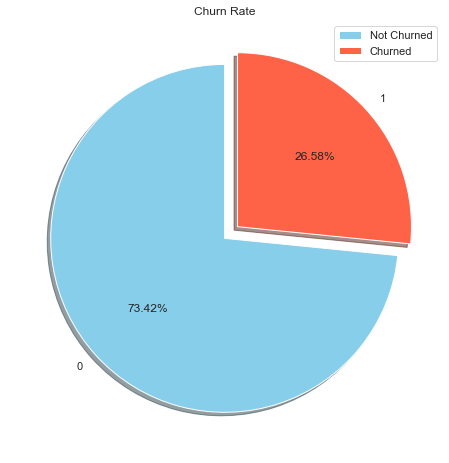

In [20]:
# Plot
colors = ['skyblue', 'tomato']
plt.figure(figsize=(8, 8))
plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.2f%%', startangle=90, colors=colors, explode=(0, 0.1), shadow=True)
plt.title('Churn Rate')
plt.legend(['Not Churned', 'Churned'], loc='upper right')
plt.show()

From the pie chart, we can see 26.6% of customers churned and 73.4% retained. To maintain this positive trends in customer retention, it is important for companies to investigate the causes of customer churn and develop strategies accordingly.

### *Correlation Matrix*

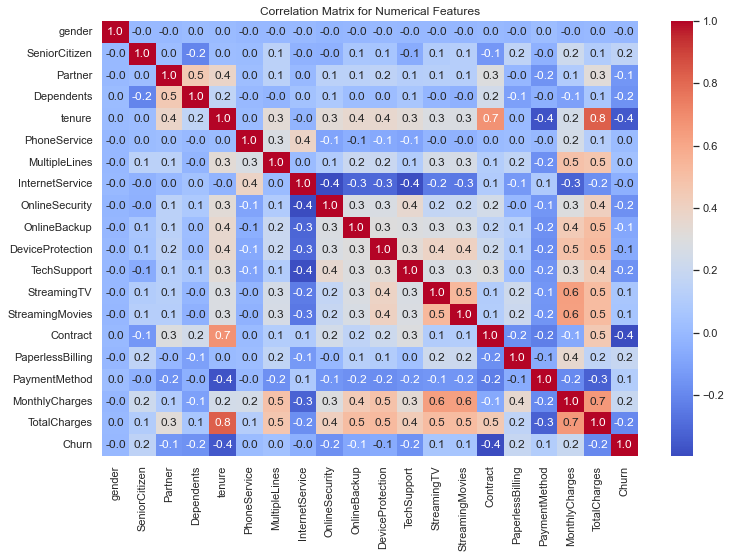

In [21]:
# Heatmap for correlation matrix to identify relationships between features
correlation_matrix = encoded_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

The heatmap reveals several positive and negative correlations providing valuable insights into customer retention strategy. One notable positive correlation is the relationship between tenure and total charges, which highlights the naturally strong correlation between customer's subscription period and the total charges incurred. Another finding is a strong positive correlation between tenure and contract type. This shows that long-term customers tend to choose long-term contracts. Another interesting positive correlation exists between StreamingTV and StreamingMovies, suggesting a preference for bundled streaming services.

On the other hand, there is a negative correlation between tenure and churn, highlighting that customers with longer subscription periods are less likely to churn. Another significant negative correlation is between contract and churn, indicating customers with long-term contracts are less likely to churn. Customers who subscribe to Internet services along with online security and tech support services show a negative correlation with churn and which indicates these complementary services are contributing to customer retention. These insights show us that customer loyalty, long-term commitments, and additional services play a critical role in minimizing customer churn.

## Analysis of Feature Selection
> Feature selection is a critical step to identify relevant features for model training. In this analysis, two distinct methods will be employed and each will offer unique insights into the importance of features within the dataset.
>
>- Random Forest Feature Importance
>- Recursive Feature Elimination(RFE)

In [22]:
# Drop the irrelevant columns for modeling
df_2 = encoded_df.drop('customerID', axis=1, errors='ignore')

In [23]:
# Split the data
X = df_2.drop('Churn', axis=1)
y = df_2['Churn']

In [24]:
# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Define the function for training and evaluating
def train_and_evaluate(X_sel, y, method_name):
    X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y, test_size=0.2, random_state=42)

    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train_sel, y_train_sel)

    y_pred = lr_model.predict(X_test_sel)
    y_prob = lr_model.predict_proba(X_test_sel)[:, 1]

    accuracy = accuracy_score(y_test_sel, y_pred)
    roc_auc = roc_auc_score(y_test_sel, y_prob)
    class_report = classification_report(y_test_sel, y_pred)

    print("Selected Features:", X_sel.columns)
    print('\n')
    print("Accuracy:", accuracy)
    print("ROC-AUC:", roc_auc)
    print('\n')
    print("Classification Report:")
    print(class_report)

    # Confusion matrix
    cm = confusion_matrix(y_test_sel, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix: {method_name}")
    plt.show()

### *Random Forest Feature Importance*
This method ranks features by their importance in a random forest classifier. It considers the contribution of each feature to the overall accuracy of predictions.

Selected Features: Index(['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'gender', 'PaperlessBilling', 'OnlineSecurity',
       'Partner'],
      dtype='object')


Accuracy: 0.7839374555792467
ROC-AUC: 0.8232679853601212


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



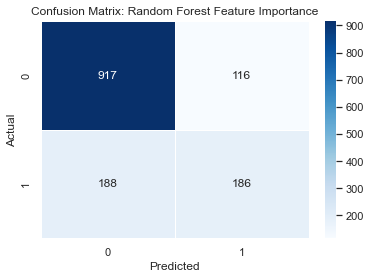

In [26]:
# Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y.values.ravel())
feat_scores_rf = pd.DataFrame({"Feature Importance": rf.feature_importances_}, index=X.columns)
sel_features_rf = feat_scores_rf.sort_values(by="Feature Importance", ascending=False).head(10).index
X_selected_rf = X[sel_features_rf]

# Call the function
train_and_evaluate(X_selected_rf, y, "Random Forest Feature Importance")

The model can predict customer churn and non-churn cases with an overall accuracy of approximately 78.4%. It achieves a ROC-AUC score of 82.3%, indicating good performance in distinguishing between churn and non-churn instances. Notably, the precision for predicting churn is 62%, meaning 62% of the predicted churn cases are true positives, while the precision for predicting non-churn is 83%. The recall for predicting churn is 51%, indicating the correct identification of 50% of actual churn cases.

The balanced F1-score of 78% emphasizes the model's effectiveness, especially considering imbalanced classes. The confusion matrix analysis reveals that out of the 302 cases predicted as churn, 186 were accurately identified, aligning with the precision for churn predictions.

### *Recursive Feature Elimination (RFE) with Logistic Regression*
This method systematically eliminates less important features by considering the coefficients of a logistic regression model.

Selected Features: Index(['SeniorCitizen', 'Dependents', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling'],
      dtype='object')


Accuracy: 0.749822316986496
ROC-AUC: 0.7811666865109153


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1033
           1       0.54      0.36      0.43       374

    accuracy                           0.75      1407
   macro avg       0.67      0.63      0.64      1407
weighted avg       0.73      0.75      0.73      1407



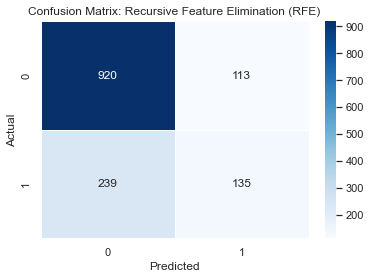

In [27]:
# Recursive Feature Elimination(RFE)
lr_model_rfe = LogisticRegression(max_iter=1000)
rfe = RFE(lr_model_rfe, n_features_to_select=10)
rfe.fit(X, y)
sel_features_rfe = X.columns[rfe.support_]
X_selected_rfe = X[sel_features_rfe]

# Call the function
train_and_evaluate(X_selected_rfe, y, "Recursive Feature Elimination (RFE)")

Recursive Feature Elimination (RFE) method achieved an accuracy of 74.98%, accurately predicting customer churn and non-churn cases in approximately 75% of instances. The ROC-AUC score of 78.12% indicates the model's performance in distinguishing between churn and non-churn cases. Precision for predicting churn is 54%, showing the accuracy of positive predictions, while the precision for non-churn is 79%. The recall for churn is 36%, and for non-churn, it is 89%, highlighting the model identifies actual non-churn cases better.

The F1-score is 73%, providing an overall assessment of the model's balance. The confusion matrix analysis reveals 135 true positives, 920 true negatives.

### *Top Features*

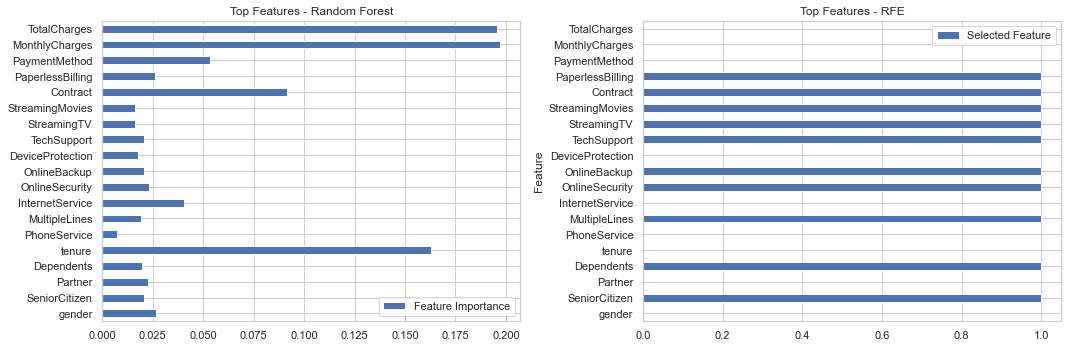

In [28]:
# Visualization for selected features 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Random Forest Feature Importance
feat_scores_rf.plot(kind="barh", ax=axes[0])
axes[0].set_title("Top Features - Random Forest")

# Recursive Feature Elimination(RFE)
feat_scores_rfe = pd.DataFrame({"Feature": X.columns, "Selected": rfe.support_})
feat_scores_rfe["Selected Feature"] = feat_scores_rfe["Selected"].astype(int)
feat_scores_rfe.set_index("Feature").plot(kind="barh", ax=axes[1])
axes[1].set_title("Top Features - RFE")

plt.tight_layout()
plt.show()

The Random Forest model performed better than RFE, with an accuracy of 78.4% and a ROC-AUC score of 82.3%, surpassing RFE's accuracy of 75% and a ROC-AUC score of 78.1%. The Random Forest model, focusing on features like contract details and payment methods, proved more effective in distinguishing between customers likely to churn and those who aren't. While both models face challenges in correctly identifying churned customers, the Random Forest model demonstrated a slightly better balance between precision and recall for churn predictions, resulting in a higher F1-score of 78%. On the other hand, RFE, while more conservative, achieved a lower accuracy of 75% and a ROC-AUC score of 78.1%, with a trade-off between precision and recall. Both methods highlights the importance of careful feature selection in improving the accuracy of predictive models for customer churn in the telecommunications industry.

# Train and Evaluate Model
>- Logistic Regression
>- SVM
>- Random Forest
>- KNN
>- Naive Bayes

### *Logistic Regression Classifier*

In [29]:
# Train Logistic Regression classifier
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
# Evaluate the classifier
y_pred_LR = model_LR.predict(X_test)

print("Clasification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_LR))

Clasification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



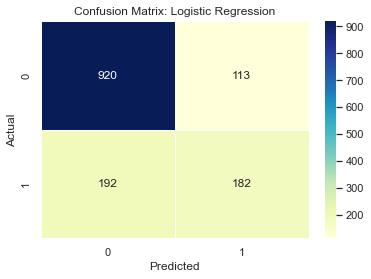

In [31]:
# Print onfusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm_LR, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

### *Support Vector Machine Classifier*

In [32]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train LinearSVC classifier
model_svm = LinearSVC(max_iter=10000, random_state=42)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000,
                                                random_state=42))

In [33]:
# Evaluate the classifier
y_pred_svm = model_svm.predict(X_test)

print("Classification Report (Linear SVC):")
print(classification_report(y_test, y_pred_svm, zero_division=1))

Classification Report (Linear SVC):
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       1.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.87      0.50      0.42      1407
weighted avg       0.80      0.73      0.62      1407



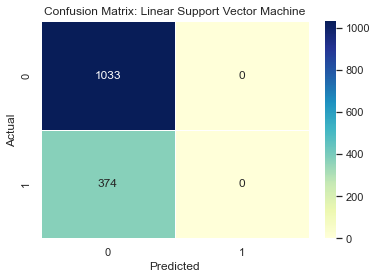

In [34]:
# Print onfusion matrix
cm_linear_svc = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_linear_svc, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix: Linear Support Vector Machine")
plt.show()

### *Random Forest Classifier*

In [35]:
# Train Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Evaluate the classifier
y_pred_rf = model_rf.predict(X_test)

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



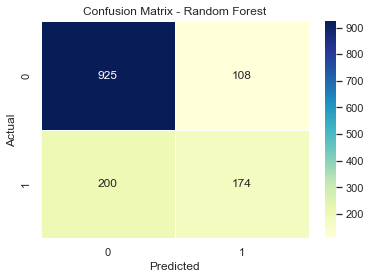

In [37]:
# Print onfusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Random Forest")
plt.show()

### *K-Nearest Neighbor (KNN)*

In [38]:
# Train KNN classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
# Evaluate the classifier
y_pred_knn = model_knn.predict(X_test)

print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1033
           1       0.59      0.44      0.51       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.75      0.77      0.76      1407



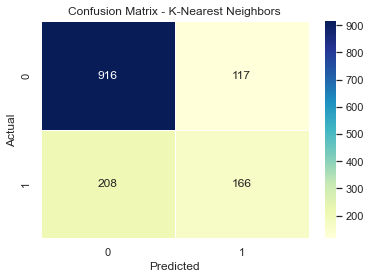

In [40]:
# Print confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

### *Naive Bayes Classifier*

In [41]:
# Train Naive Bayes classifier
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [42]:
# Evaluate the classifier
y_pred_nb = model_gnb.predict(X_test)

print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1033
           1       0.51      0.71      0.59       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



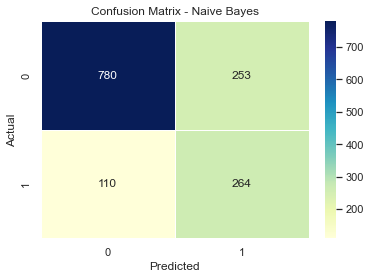

In [43]:
# Print confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

### *Model Comparison*

In [44]:
# Accuracy
acc_LR = accuracy_score(y_test, y_pred_LR)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("<Model Accuracy Comparison>") 
print("Logistic Regression: ", acc_LR) 
print("Support Vector Machine: ", acc_svm) 
print("Random Forest: ", acc_rf) 
print("K-Nearest Neighbors: ", acc_knn)
print("Naive Bayes: ", acc_nb) 

<Model Accuracy Comparison>
Logistic Regression:  0.783226723525231
Support Vector Machine:  0.7341862117981521
Random Forest:  0.7810945273631841
K-Nearest Neighbors:  0.7690120824449183
Naive Bayes:  0.7420042643923241


In [45]:
# AUC score
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("<Model AUC Score Comparison>") 
print("Logistic Regression: ", auc_score1) 
print("Support Vector Machine: ", auc_score2) 
print("Random Forest: ", auc_score3) 
print("K-Nearest Neighbors: ", auc_score4) 
print("Naive Bayes: ", auc_score5)

<Model AUC Score Comparison>
Logistic Regression:  0.8293739743543286
Support Vector Machine:  0.7915629157585766
Random Forest:  0.8130335298776732
K-Nearest Neighbors:  0.7359813326016845
Naive Bayes:  0.808822235221643


In [46]:
# ROC curve
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)

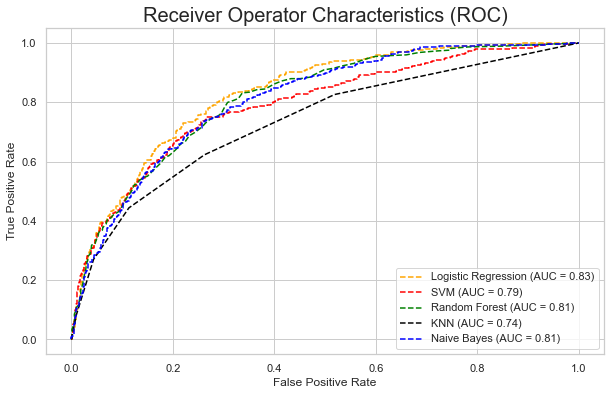

In [47]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, linestyle="--", color="orange", label="Logistic Regression (AUC = {:.2f})".format(auc_score1))
plt.plot(fpr2, tpr2, linestyle="--", color="red", label="SVM (AUC = {:.2f})".format(auc_score2))
plt.plot(fpr3, tpr3, linestyle="--", color="green", label="Random Forest (AUC = {:.2f})".format(auc_score3))
plt.plot(fpr4, tpr4, linestyle="--", color="black", label="KNN (AUC = {:.2f})".format(auc_score4))
plt.plot(fpr5, tpr5, linestyle="--", color="blue", label="Naive Bayes (AUC = {:.2f})".format(auc_score5))
plt.title('Receiver Operator Characteristics (ROC)', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

Among the five machine learning models examined for predicting customer churn in the telecommunications industry, logistic regression and random forest were the best performers. They showed similar accuracies and AUC scores, suggesting a good balance between precision and recall. Especially logistic regression had the highest AUC, showing  superior performance in classifying churned and retained customers among the models.

On the other hand, support vector machine(SVM) had trouble predicting churn cases, resulting in a low F1-score for churn predictions. K-Nearest Neighbors(KNN) and naive bayes showed decent performance, but there were trade-offs between precision and recall, suggesting they could be improved with further optimization.

The ROC curve shows that the logistic regression produced the best AUC, showing it's great at classifying churned or retained telecommunications customers. The random forest classifier also stood out with the highest accuracy and ROC-AUC score among the models.

In summary, logistic regression and random forest are strong choices for predicting customer churn, with logistic regression leading in AUC. SVM faced challenges in identifying churned customers, and KNN and naive bayes did reasonably well but could be optimized. The analysis highlights the importance of selecting the right model for accurate and balanced predictions in telecommunications customer churn.

## Optimization And Feature Importance Analysis 
> After training and evaluating five models, we perform hyperparameter tuning for Logistic Regression using GridSearchCV
>
>- Grid Search
>- Feature Importance

### *Grid Search With Logistic Regression*

In [48]:
# Define the parameters for grid search
parameters = [{'penalty': ['l2'], 'C': [1, 10, 100, 1000]}]

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='lbfgs'),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=0)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': [1, 10, 100, 1000], 'penalty': ['l2']}],
             scoring='accuracy')

In [49]:
# Print the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_acc = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy:", best_acc)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Accuracy: 0.8048


In [50]:
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
best_coef = best_model.coef_

### *Feature Importance Plot*

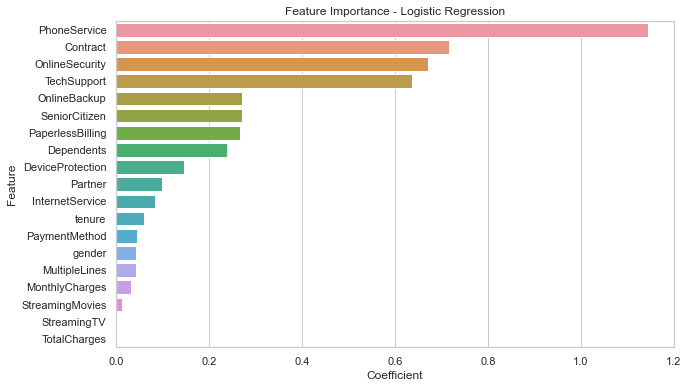

In [51]:
# Create dataframe with coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': np.abs(best_coef[0])})

# Sort the dataframe based on the absolute values of coefficients
ranked_features = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot for feature_importance
plt.figure(figsize=(10, 6))
sns.barplot(x=ranked_features['Coefficient'], y=ranked_features['Feature'])
plt.title('Feature Importance - Logistic Regression')
plt.show()

## Conclusion

We used a logistic regression model to find out what factors affect customer churn. The size of each feature's coefficient tells us how much it affects predicting customer churn. The larger the coefficient, the more impact that feature has in determining the likelihood of churn. Features like 'PhoneService', 'Contract', 'OnlineSecurity', and 'TechSupport' play a key role in predicting customer churn. So, it's important to establish a strategy that takes these features into account.

Specifically, 'PhoneService' has the highest coefficient, meaning having a phone service significantly affects the chance of customer churn. To keep customers, paying attention to those using phone services and offering special deals or targeted messages can be effective in order to retain customers. The contract type is also important feature to consider. Optimizing contract structures is recommended as one of the strategies for companies to minimize customer churn rate. As a result, establishing business strategies considering these factors is likely to improve customer loyalty and reduce churn.

Additionally, deploying the model on a server using such as 'joblib' library allows the creation of an end-to-end machine learning framework. This enables the model to be executed on new datasets, predicting the probability of customer churn in the future. Sharing the key insights gained from the analysis with sales and marketing teams is recommended. By informing the sales team about features with positive and negative correlations to churn, they can strategize retention initiatives accordingly. Categorizing future customers into high-risk, medium-risk, and low-risk segments based on customer tendencies allows for targeted efforts to address specific needs in each segment.

The machine learning models and analytics provide valuable insights to the telecommunications industry. These insights enables strategic interventions to minimize customer churn and increase business sustainability. Feature importance analysis can help companies improve their strategies by focusing on specific features which have a significant impacts on customer churn, such as strengthening online security and technical support services. These strategies, based on the analysis, will help increase customer retention and contribute to the overall project goal of improving business profitability.